# GDP Data Cleaning 

This notebook cleans the World Bank GDP data to only include GDP values for 2021, region, and IncomeGroup variables. Following cleaning, the data is merged with the Netflix data. 
Only the countries included in both datasets are kept in the final analytic dataset.

In [1]:
import pandas as pd 
import numpy as np 
import os 

In [2]:
os.chdir("/Users/chloedearman/DS-Netflix-Project")

In [3]:
path_to_gdp = "/Users/chloedearman/DS-Netflix-Project/gdp_data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3628616.csv"

In [4]:
path_to_metadata = "/Users/chloedearman/DS-Netflix-Project/gdp_data/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3628616.csv"

In [5]:
path_to_netflix = "/Users/chloedearman/DS-Netflix-Project/Netflix subscription fee Dec-2021.csv"

 ### Cleaning GDP Data 

In [6]:
df_gdp = pd.read_csv(path_to_gdp, skiprows = 3, header = 0 , dtype = str)

In [7]:
df_gdp2 = df_gdp[['Country Code','Country Name', '2020']].copy()

In [8]:
df_gdp2 = df_gdp2.rename(columns={'2020':'2020_GDP'})
df_gdp2['2020_GDP'] = df_gdp2['2020_GDP'].apply(lambda x: float(x) if isinstance(x, str) else x)

In [9]:
df_gdp2.head()

,Country Code,Country Name,2020_GDP
0,ABW,Aruba,NaN
1,AFE,Africa Eastern and Southern,9.207923e+11
2,AFG,Afghanistan,2.011614e+10
3,AFW,Africa Western and Central,7.845876e+11
4,AGO,Angola,5.837598e+10


### Cleaning Meta Data 

In [10]:
df_meta = pd.read_csv(path_to_metadata, header = 0 , dtype = str, usecols = [0,1,2])

In [11]:
df_meta.head()
len(df_meta)

265

### Merging data 

In [12]:
GDP_Final = pd.merge(df_gdp2, df_meta, on="Country Code", how="right") 

In [14]:
GDP_Final.head(30)

,Country Code,Country Name,2020_GDP,Region,IncomeGroup
0,ABW,Aruba,NaN,Latin America & Caribbean,High income
1,AFE,Africa Eastern and Southern,9.207923e+11,NaN,NaN
2,AFG,Afghanistan,2.011614e+10,South Asia,Low income
3,AFW,Africa Western and Central,7.845876e+11,NaN,NaN
4,AGO,Angola,5.837598e+10,Sub-Saharan Africa,Lower middle income
5,ALB,Albania,1.488763e+10,Europe & Central Asia,Upper middle income
6,AND,Andorra,NaN,Europe & Central Asia,High income
7,ARB,Arab World,2.447584e+12,NaN,NaN
8,ARE,United Arab Emirates,3.588688e+11,Middle East & North Africa,High income
9,ARG,Argentina,3.892881e+11,Latin America & Caribbean,Upper middle income


### Exporting GDP Data 

In [15]:
GDP_Final.to_csv('gdp_data/gdp_final.csv') 

### Merging with Netlflix data

In [16]:
netflix = pd.read_csv(path_to_netflix, header = 0)

In [17]:
netflix = netflix.rename(columns={'Country':'Country Name'})

In [18]:
#Change the names for a perfect match 
GDP_Final.replace({'Country Name':{'Czech Republic': 'Czechia', 'Hong Kong SAR, China': 'Hong Kong', 
                 'Russian Federation': 'Russia', 'Slovak Republic': 'Slovakia',
                 'Korea, Rep.': 'South Korea', 'Venezuela, RB': 'Venezuela'}}, value = None, inplace=True)
                            
GDP_Final.tail(50)               

,Country Code,Country Name,2020_GDP,Region,IncomeGroup
215,SSD,South Sudan,NaN,Sub-Saharan Africa,Low income
216,SSF,Sub-Saharan Africa,1.705380e+12,NaN,NaN
217,SST,Small states,4.514237e+11,NaN,NaN
218,STP,Sao Tome and Principe,4.729145e+08,Sub-Saharan Africa,Lower middle income
219,SUR,Suriname,2.884248e+09,Latin America & Caribbean,Upper middle income
220,SVK,Slovakia,1.051726e+11,Europe & Central Asia,High income
221,SVN,Slovenia,5.358961e+10,Europe & Central Asia,High income
222,SWE,Sweden,5.412201e+11,Europe & Central Asia,High income
223,SWZ,Eswatini,3.972729e+09,Sub-Saharan Africa,Lower middle income
224,SXM,Sint Maarten (Dutch part),NaN,Latin America & Caribbean,High income


In [19]:
netflix_gdp = pd.merge(netflix, GDP_Final, on = "Country Name", how = "left")

In [20]:
netflix_gdp2 = netflix_gdp.drop(columns = 'Country Code')

In [29]:
netflix_gdp2 = netflix_gdp2.rename(columns={'Country Name':'Country',
                                   'Total Library Size':'Total_Library_Size',
                                  'No. of TV Shows': 'TV_num',
                                  'No. of Movies': 'Movies_num',
                                  'Cost Per Month - Basic ($)': 'Basic_CPM',
                                  'Cost Per Month - Standard ($)': 'Standard_CPM',
                                  'Cost Per Month - Premium ($)': 'Premium_CPM',
                                    '2020_GDP' :  "GDP_2020"})


In [30]:
sum(netflix_gdp2.isna()["GDP_2020"])

KeyError: '2020_GDP'

### Exporting Final Analystic Dataset

In [31]:
netflix_gdp2.to_csv('Netflix_GDP_Merged.csv') 

### Statistics Models


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [36]:
netflix_gdp2.dtypes

Country_code           object
Country                object
Total_Library_Size      int64
TV_num                  int64
Movies_num              int64
Basic_CPM             float64
Standard_CPM          float64
Premium_CPM           float64
GDP_2020              float64
Region                 object
IncomeGroup            object
dtype: object

In [37]:
results_basic = smf.ols('Basic_CPM ~ TV_num + Region + Movies_num + GDP_2020', data=netflix_gdp2).fit()

print(results_basic.summary())

                            OLS Regression Results                            
Dep. Variable:              Basic_CPM   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3.240
Date:                Tue, 12 Apr 2022   Prob (F-statistic):            0.00359
Time:                        13:48:57   Log-Likelihood:                -109.82
No. Observations:                  60   AIC:                             239.6
Df Residuals:                      50   BIC:                             260.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [38]:
results_standard = smf.ols('Standard_CPM ~ TV_num + Region + Movies_num + GDP_2020', data=netflix_gdp2).fit()

print(results_standard.summary())

                            OLS Regression Results                            
Dep. Variable:           Standard_CPM   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2.169
Date:                Tue, 12 Apr 2022   Prob (F-statistic):             0.0404
Time:                        13:49:06   Log-Likelihood:                -134.69
No. Observations:                  60   AIC:                             289.4
Df Residuals:                      50   BIC:                             310.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [39]:
results_premium = smf.ols('Premium_CPM ~ TV_num + Region + Movies_num + GDP_2020', data=netflix_gdp2).fit()

print(results_premium.summary())

                            OLS Regression Results                            
Dep. Variable:              Basic_CPM   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3.240
Date:                Tue, 12 Apr 2022   Prob (F-statistic):            0.00359
Time:                        13:49:10   Log-Likelihood:                -109.82
No. Observations:                  60   AIC:                             239.6
Df Residuals:                      50   BIC:                             260.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


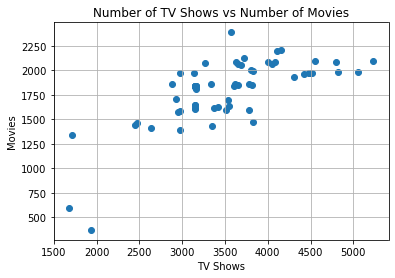

In [28]:
plt.scatter(netflix_gdp2.TV_num, netflix_gdp2.Movies_num)
plt.title('Number of TV Shows vs Number of Movies')
plt.xlabel('TV Shows') 
plt.ylabel('Movies') 
plt.grid()

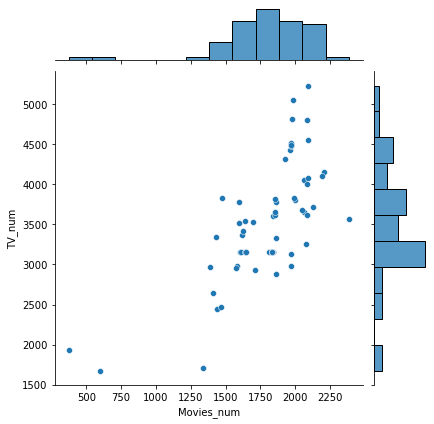

In [32]:
sns.jointplot(data=netflix_gdp2, x="Movies_num", y="TV_num")

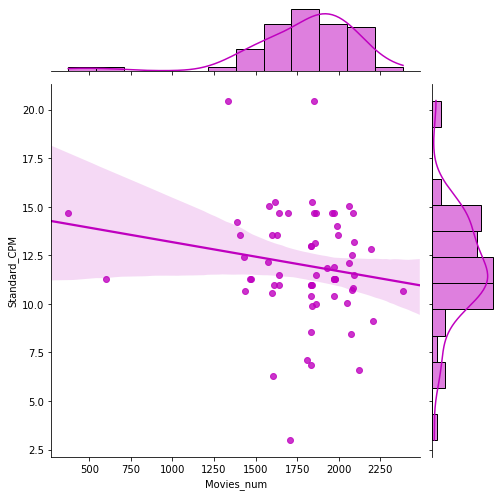

In [33]:
sns.jointplot(data=netflix_gdp2, x="Movies_num", y="Standard_CPM",
              kind="reg", truncate=False,
              color="m", height=7)